# Notebook showing a few brief examples of plot options

## Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from matplotlib import rcParams
from mosquito.process_abf import load_processed_data


## Plot parameters

In [2]:
# PLOT PARAMETERS
plot_type = 'paper'  # 'paper' or 'powerpoint'

# # generate a dictionary called fig params that encodes information we care about
if plot_type == 'powerpoint':
    fontsize = 14
    figsize = (10,7.5)
    subplot_left = 0.15
    subplot_right = 0.85
    subplot_top = 0.8
    subplot_bottom = 0.15
elif plot_type == 'paper':
    fontsize = 8
    figsize = (8,8)
    subplot_left = 0.2
    subplot_right = 0.8
    subplot_top = 0.8
    subplot_bottom = 0.2

fig_params = {
      'font.family' : 'sans-serif',
      'font.serif' : 'Times, Palatino, New Century Schoolbook, Bookman, Computer Modern Roman',
      'font.sans-serif' : 'arial, Helvetica, Avant Garde, Computer Modern Sans serif',
      'font.cursive' : 'Zapf Chancery',
      'font.monospace' : 'Courier, Computer Modern Typewriter',
      'font.size' : fontsize,
      'axes.labelsize': fontsize,
      'axes.linewidth': 1.0,
      'xtick.major.width': 1,
      'xtick.minor.width': 1,
      'xtick.labelsize': fontsize,
      'ytick.labelsize': fontsize,
      'figure.figsize': figsize,
}
rcParams.update(fig_params) 

## Load/read data

In [3]:
# load some data
example_folder = '31_20240611'
example_axo = 4

data = load_processed_data(example_folder, example_axo)

# keys for info in data dictionary:
print('Key options we can use:')
print('-------------------------')
for key in data.keys():
    print(key)

Key options we can use:
-------------------------
sampling_freq
filepath
units
header
time
emg
cam
mic
odor
species
muscle_type
filename
mic_filt
mic_phase
wbf_mean
wbf
flying_idx
emg_filt
spikes
spike_t
spike_idx
spike_rate
params


In [4]:
# example reading out a data set
data['wbf']

array([169.1817, 169.1817, 169.1817, ..., 173.2313, 173.2311, 173.2308])

## Example plots

Text(0, 0.5, 'wingbeat frequency (Hz)')

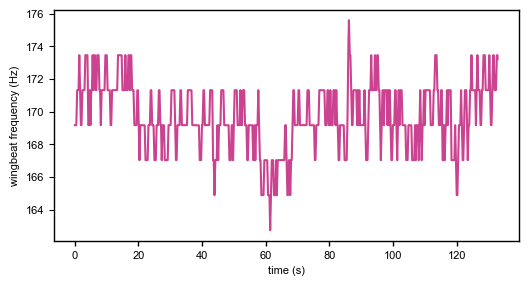

In [5]:
# playing with axis properties
fig, ax = plt.subplots(figsize=(6,3))

x = data['time']  # np.arange(10)
y = data['wbf']  # 3*np.arange(10)

ax.plot(x, y,
        color='#CB4290',  # for color options, see https://matplotlib.org/1.4.1/api/colors_api.html
        linestyle='-',   # linestyle options are https://matplotlib.org/stable/gallery/lines_bars_and_markers/linestyles.html
        marker='None',     # marker options https://matplotlib.org/stable/api/markers_api.html
       )

# set labels
ax.set_xlabel('time (s)')
ax.set_ylabel('wingbeat frequency (Hz)')


{'whiskers': [<matplotlib.lines.Line2D at 0x7ae0e83f6ff0>,
 'caps': [<matplotlib.lines.Line2D at 0x7ae0e84b0680>,
 'boxes': [<matplotlib.lines.Line2D at 0x7ae0e8473ef0>],
 'medians': [<matplotlib.lines.Line2D at 0x7ae0e84b0c80>],
 'fliers': [<matplotlib.lines.Line2D at 0x7ae0e84b0f50>],
 'means': []}

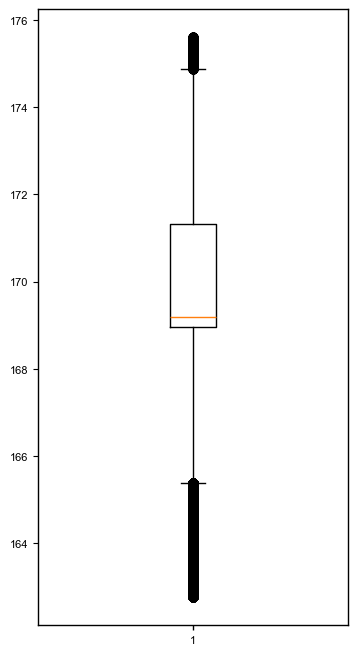

In [6]:
# now let's make a box and whisker plot
fig, ax = plt.subplots(figsize=(4,8))

# read out data (wingbeat frequency)
wbf = data['wbf'] 

# make a boxplot of it
ax.boxplot(wbf)


Text(0, 0.5, 'probability density')

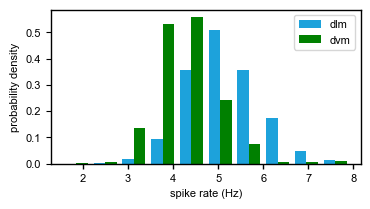

In [26]:
# now let's make a histogram plot
fig, ax = plt.subplots(figsize=(4,2))

# load example data sets
data_folder = '31_20240611'
dlm_axo_num = 4
dvm_axo_num = 6

dlm_data = load_processed_data(data_folder, dlm_axo_num)
dvm_data = load_processed_data(data_folder, dvm_axo_num)

# read out data that we want to make histogram of 
dlm_spike_rate = dlm_data['spike_rate']
dvm_spike_rate = dvm_data['spike_rate']

# put data into a list that we can loop over
spike_rate_list = [dlm_spike_rate, dvm_spike_rate]
labels = ['dlm', 'dvm']

# set the colors that we want to use
colors = ['#1DA2DB', 'green']

# make histogram
# Note: density=True normalizes the plot so that it integrates to one
ax.hist([dlm_spike_rate, dvm_spike_rate], label=labels, density=True, color=colors)
plt.legend()

ax.set_xlabel('spike rate (Hz)')
ax.set_ylabel('probability density')

## Example calculations

In [13]:
# if we want to get mean or median from data:
# first read out array from the dictionary called data. here we'll grab the wingbeat frequency and assign it to a variable called wbf 
wbf = data['wbf'] 

# use numpy to calculate mean of the data. to use any numpy function, we type "np.(function name)" where the function name can be lots of 
# different options. several are listed here: https://numpy.org/doc/stable/reference/routines.statistics.html
wbf_mean = np.mean(wbf)
print('mean: ', wbf_mean)

# similarly, to get median, we do:
wbf_median = np.median(wbf)
print('median: ', wbf_median)

# similarly, to get standard deviation, we do:
wbf_std = np.std(wbf)
print('standard deviation: ', wbf_std)

mean:  169.7093174267894
median:  169.18170166015625
standard deviation:  1.9589544114617126
